In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("copd.csv")

In [3]:
df.shape

(99, 8)

In [4]:
df.head(2)

,age,gender,weight,lipcolor,FEV1,smoking intensity,temperature,label
0,20,0,48,1,0.24,0.8,103,severe
1,70,1,58,0,0.54,0.6,98,moderate


In [5]:
df.isnull().sum()

age                  0
gender               0
weight               0
lipcolor             0
FEV1                 0
smoking intensity    0
temperature          0
label                0
dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='Count'>

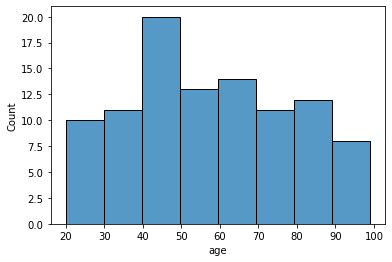

In [7]:
sns.histplot(df["age"])

<AxesSubplot:xlabel='label', ylabel='Count'>

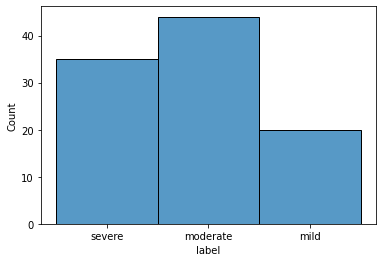

In [8]:
sns.histplot(df["label"])

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
l=LabelEncoder()

In [11]:
label=l.fit_transform(df["label"])

In [12]:
a=df.drop("label",axis=1)

In [13]:
a["label"]=label

In [14]:
a.head(2)

,age,gender,weight,lipcolor,FEV1,smoking intensity,temperature,label
0,20,0,48,1,0.24,0.8,103,2
1,70,1,58,0,0.54,0.6,98,1


In [15]:
X=a.drop("label",axis=1)

In [16]:
y=a[["label"]]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
li=LogisticRegression()

In [21]:
li.fit(X_train,y_train)

LogisticRegression()

In [22]:
value=li.predict(X_test)

In [23]:
value

array([2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2,
       1, 2, 1, 2, 1, 2])

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
accuracy_score(value,y_test)

0.76

In [26]:
confusion_matrix(value,y_test)

array([[ 6,  1,  0],
       [ 2, 16,  3],
       [ 0,  6, 16]], dtype=int64)

In [27]:
classification_report(value,y_test)

'              precision    recall  f1-score   support\n\n           0       0.75      0.86      0.80         7\n           1       0.70      0.76      0.73        21\n           2       0.84      0.73      0.78        22\n\n    accuracy                           0.76        50\n   macro avg       0.76      0.78      0.77        50\nweighted avg       0.77      0.76      0.76        50\n'